<a href="https://colab.research.google.com/github/kajok88/Intro2AI/blob/main/teht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

9568
5
-------------------
[[   8.34   40.77 1010.84   90.01  480.48]
 [  23.64   58.49 1011.4    74.2   445.75]
 [  29.74   56.9  1007.15   41.91  438.76]
 [  19.07   49.69 1007.22   76.79  453.09]
 [  11.8    40.66 1017.13   97.2   464.43]]
[480.48 445.75 438.76 453.09 464.43]


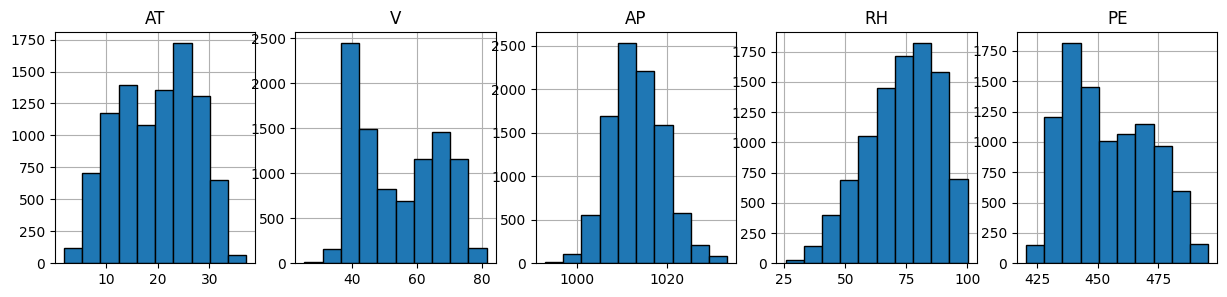

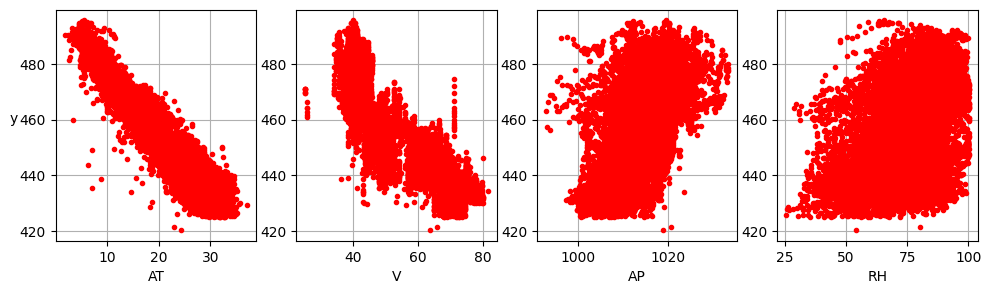

In [3]:
#-----------------------
#-- Linear regression --
#-----------------------

# Teht. 1

# Read the headers
with open('Folds5x2_pp.csv', 'r') as f:
    headers = f.readline().strip().split(',')
#read the dataset into a matrix data
data=np.loadtxt('Folds5x2_pp.csv', delimiter=',', skiprows=1)
X=data[:,:5] #coodinates [x1,x2,x3,x4]=[T,V,AP,RH] as rows
y=data[:,4] #values of PE to be predicted

m,n=data.shape
# print(m)
# print(n)

# print("-------------------")
print(X[:5,:])
print(y[:5])

#distribution of values of the variables
plt.figure(figsize=(15,3))
for k in range(5):
  plt.subplot(1,5,k+1)
  plt.hist(X[:,k],10,edgecolor='k',zorder=2)
  plt.grid()
  plt.title(headers[k])

#dependency of y of the variables x1-x4
plt.figure(figsize=(15,3))
for k in range(4):
  plt.subplot(1,5,k+1)
  plt.plot(X[:,k],y,'r.')
  plt.grid()
  plt.xlabel(headers[k])
  if k==0:
    plt.ylabel('y',rotation=0)


# Coefficients and scaled coordinates

X = data[:, :4]
y = data[:, 4]

#scaled coordinates, means=0 and standard deviations=1
mu=np.mean(X,axis=0) #means of the coordinates of the datapoints, [mu1,mu2,mu3,mu4]
#print(mu)
s=np.std(X,axis=0) #standard deviations of the coordinates, [s1,s2,s3,s4]
#print(s)
Xhat=(X-mu)/s #scaled coordinates, [(x1-mu1)/s1,(x2-mu2)/s2,(x3-mu3)/s3,(x4-mu4)/s4]

#coefficients for the formula using the scaled coordinates
model_hat=LinearRegression().fit(Xhat,y)
print("Coefficients and scaled coordinates: ")
print("Ans w= ")
what=model_hat.coef_
print(what)
bhat=model_hat.intercept_
print(bhat)


#predicted values for y from the formula
ypred=np.sum(what*Xhat,axis=1)+bhat

#minimum value of the cost
#mse=mean squared error
mse=1/m*np.sum((ypred-y)**2)
#print(mse)
#mae=mean average error
mae=1/m*np.sum(np.abs(ypred-y))
#print(mae)

#given y vs. predicted y
ymin=np.min(y)
ymax=np.max(y)

plt.figure(figsize=(5,5))
plt.plot(y,ypred,'r.')
plt.plot([ymin,ymax],[ymin,ymax],'b')
plt.grid()
plt.axis('equal')
plt.xlabel('y')
plt.ylabel('ypred')
plt.title('mse =' + str(round(mse, 3)) + ', ' + 'mae = ' + str(round(mae, 3)))
plt.show()
